In [1]:
library(ggplot2)
library(RColorBrewer)
library(cowplot)
library(gridExtra)
library(ggsci)
library(scales)
library(viridis)
library(tidyverse)

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::combine()    masks gridExtra::combine()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()


In [2]:
demux_order <- c('demuxlet','freemuxlet','vireo','vireo_nogenos','souporcell',
                 'souporcell_nogenos','demuxalot', 'ambimux_gex', 'ambimux')
demux_hex = c('#FF3004', '#F98502', '#00A931', '#48D571', '#033B91', '#376BBB', '#664110')

length(demux_hex)

[1] 7

In [3]:
igvf_palette <- c('#F44336','#5F3EB6','#01B0E7','#71BB4C','#000000')
# adelus_palette <- c('#F44336','#5F3EB6','#01B0E7','#71BB4C','#FFC911','#795548')

nb.cols <- 14
adelus_palette <- colorRampPalette(brewer.pal(8, "Spectral"))(nb.cols)
### let's make non-singlets black...?
adelus_palette[14] <- '#000000'

In [4]:
num_donors = 12
donor_list <- c()

for (i in 1:num_donors) {
  donor_list <- c(donor_list, paste0('donor', i))
}
donor_list <- c('donor0', donor_list, 'non_singlet')
donor_list

[1] "donor0"      "donor1"      "donor2"      "donor3"      "donor4"     
 [6] "donor5"      "donor6"      "donor7"      "donor8"      "donor9"     
[11] "donor10"     "donor11"     "donor12"     "non_singlet"

In [5]:
igvf_dir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'
adelus_dir = '/u/project/cluo/terencew/demux_benchmark/adelus_2023/'

In [6]:
igvf_gex_sings = read.table(paste0(igvf_dir, 'csv/final_figures/figure4/figure_s7_gex_dist_ambimux.csv'), sep='\t', header=1)
igvf_atac_sings = read.table(paste0(igvf_dir, 'csv/final_figures/figure4/figure_s7_atac_dist_ambimux.csv'), sep='\t', header=1)

In [7]:
adelus_gex_sings = read.table(paste0(adelus_dir, 'csv/final_figures/figure4/figure_s7_gex_dist_ambimux.csv'), sep='\t', header=1)
adelus_atac_sings = read.table(paste0(adelus_dir, 'csv/final_figures/figure4/figure_s7_atac_dist_ambimux.csv'), sep='\t', header=1)

In [8]:
adelus_gex_sings

X,variable,value
<int>,<chr>,<chr>
0,demuxlet,donor9
1,demuxlet,donor1
2,demuxlet,donor10
3,demuxlet,donor4
4,demuxlet,donor9
5,demuxlet,non_singlet
6,demuxlet,donor11
7,demuxlet,donor9
8,demuxlet,donor9


In [9]:
adelus_gex_sings$value <- factor(adelus_gex_sings$value, levels = donor_list)
adelus_atac_sings$value <- factor(adelus_atac_sings$value, levels = donor_list)

In [10]:
gex_methods <- c('demuxlet','freemuxlet','vireo','vireo_nogenos',
                               'scsplit', 'scsplit_nogenos',
                               'souporcell','souporcell_nogenos','demuxalot',
                               'ambimux')

gex_methods <- rev(gex_methods)

atac_methods <- c('demuxlet','freemuxlet','vireo','vireo_nogenos',
                               'scsplit', 'scsplit_nogenos',
                               'souporcell','souporcell_nogenos','scavengers',
                               'ambimux')

atac_methods <- rev(atac_methods)

igvf_gex_sings$variable <- factor(igvf_gex_sings$variable, levels = gex_methods)
igvf_atac_sings$variable <- factor(igvf_atac_sings$variable, levels = atac_methods)

adelus_gex_sings$variable <- factor(adelus_gex_sings$variable, levels = gex_methods)
adelus_atac_sings$variable <- factor(adelus_atac_sings$variable, levels = atac_methods)

In [11]:
axis_size = 24
title_size = 30

In [12]:
head(igvf_gex_sings)

,X,variable,value
,<int>,<fct>,<chr>
1,0,demuxlet,donor3
2,1,demuxlet,donor1
3,2,demuxlet,donor3
4,3,demuxlet,donor1
5,4,demuxlet,donor1
6,5,demuxlet,donor4


In [13]:
table(igvf_gex_sings$variable)


           ambimux          demuxalot souporcell_nogenos         souporcell 
             30497              30497              30497              30497 
   scsplit_nogenos            scsplit      vireo_nogenos              vireo 
             30497              30497              30497              30497 
        freemuxlet           demuxlet 
             30497              30497 

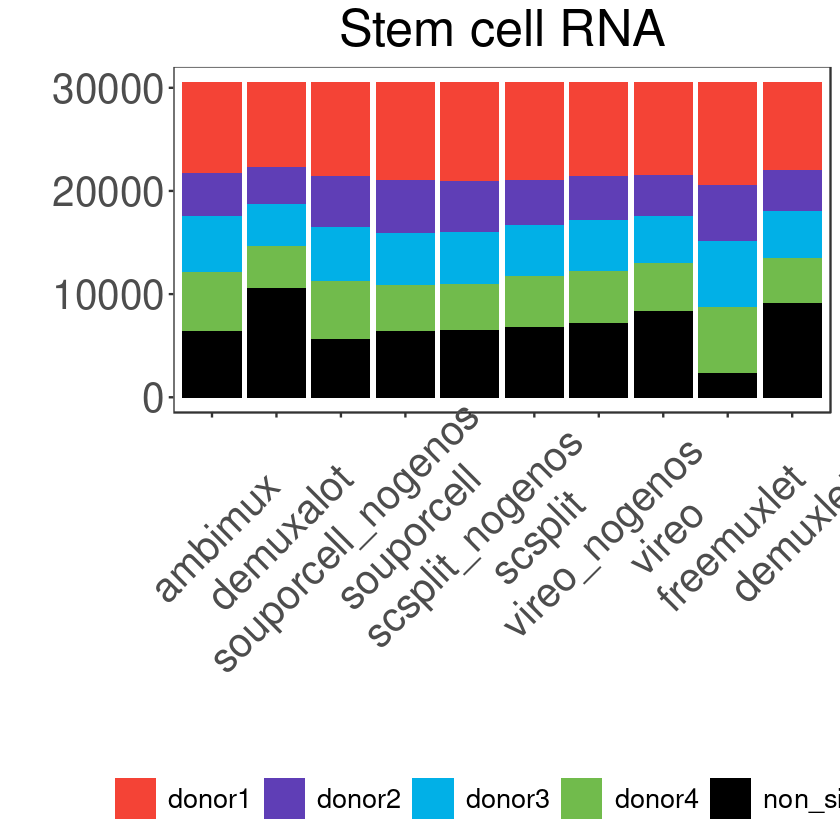

In [14]:
# options(repr.plot.width=6, repr.plot.height=8)

ggplot(igvf_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=0.6),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
#          legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
         legend.position = 'bottom',
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell RNA",fill='Assignment') +
  guides(fill = guide_legend(title = NULL, override.aes = list(size = 1.5)))

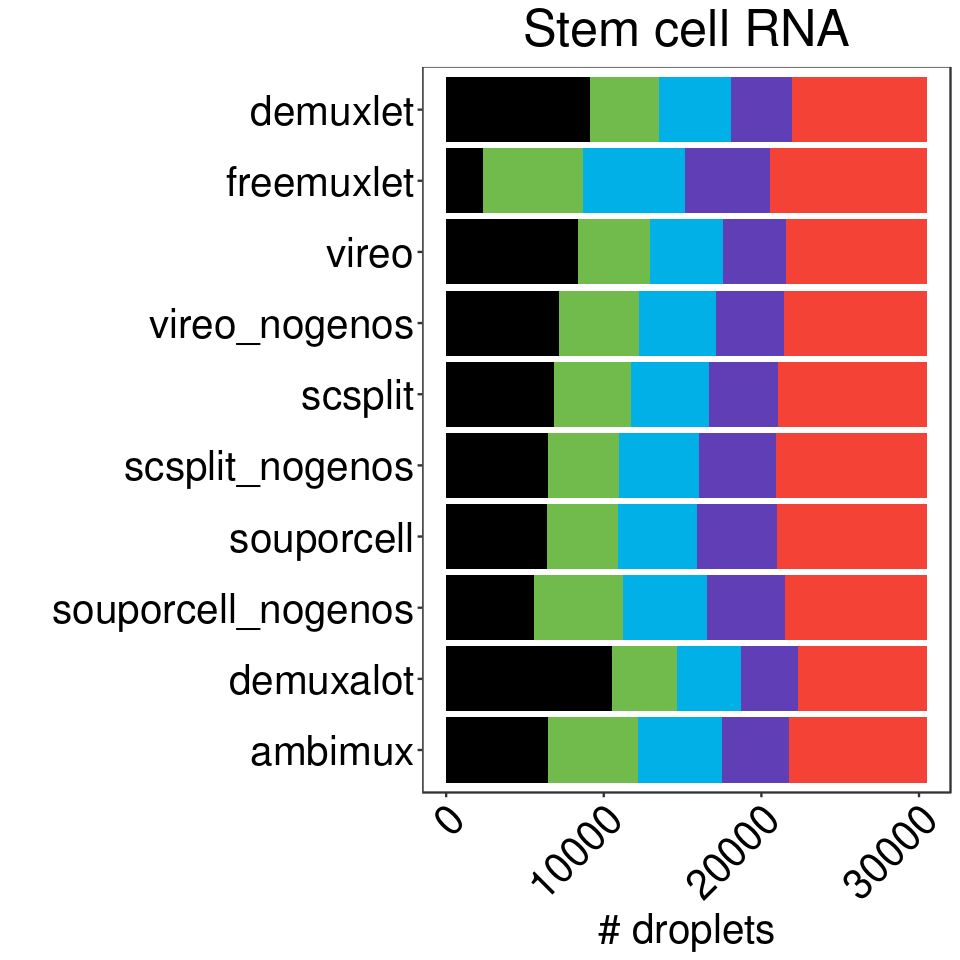

In [15]:
options(repr.plot.width=8, repr.plot.height=8)

p1 <- ggplot(igvf_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell RNA",fill='Assignment', y='# droplets') +
coord_flip()
p1

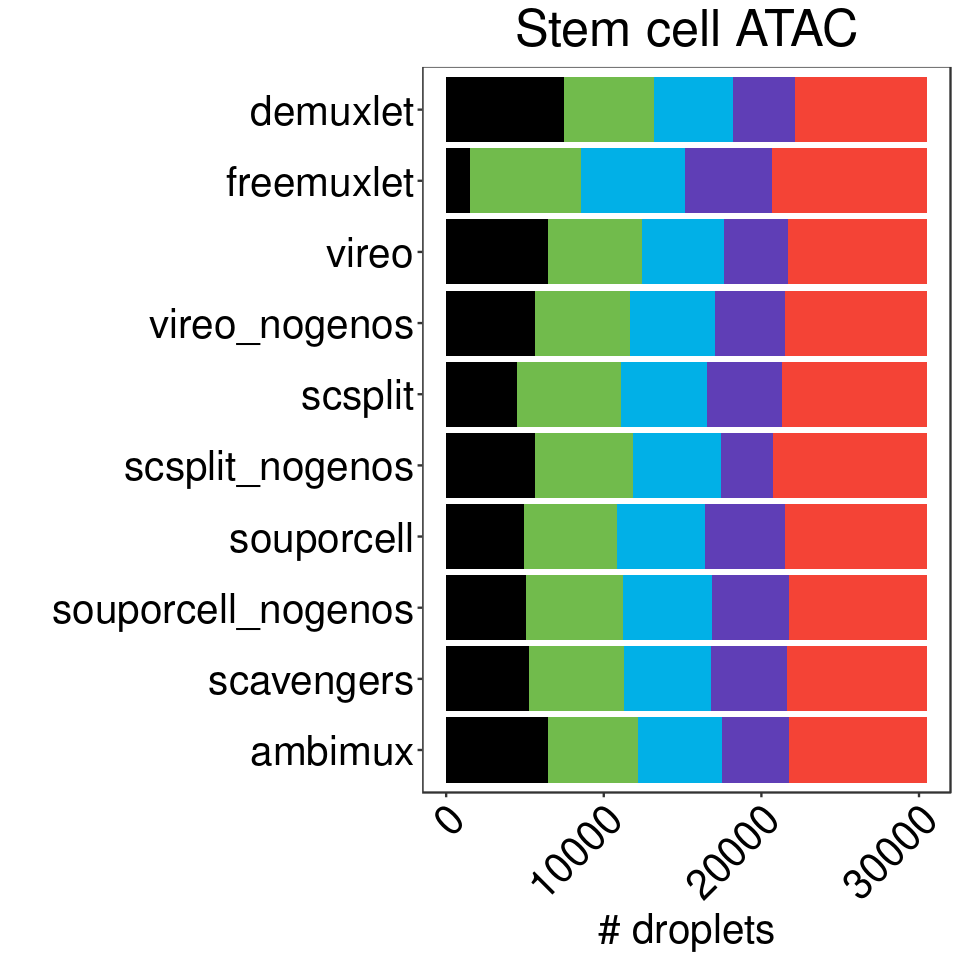

In [16]:
options(repr.plot.width=8, repr.plot.height=8)

p2 <- ggplot(igvf_atac_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell ATAC",fill='Assignment', y='# droplets') +
coord_flip()
p2

In [17]:
axis_size = 24

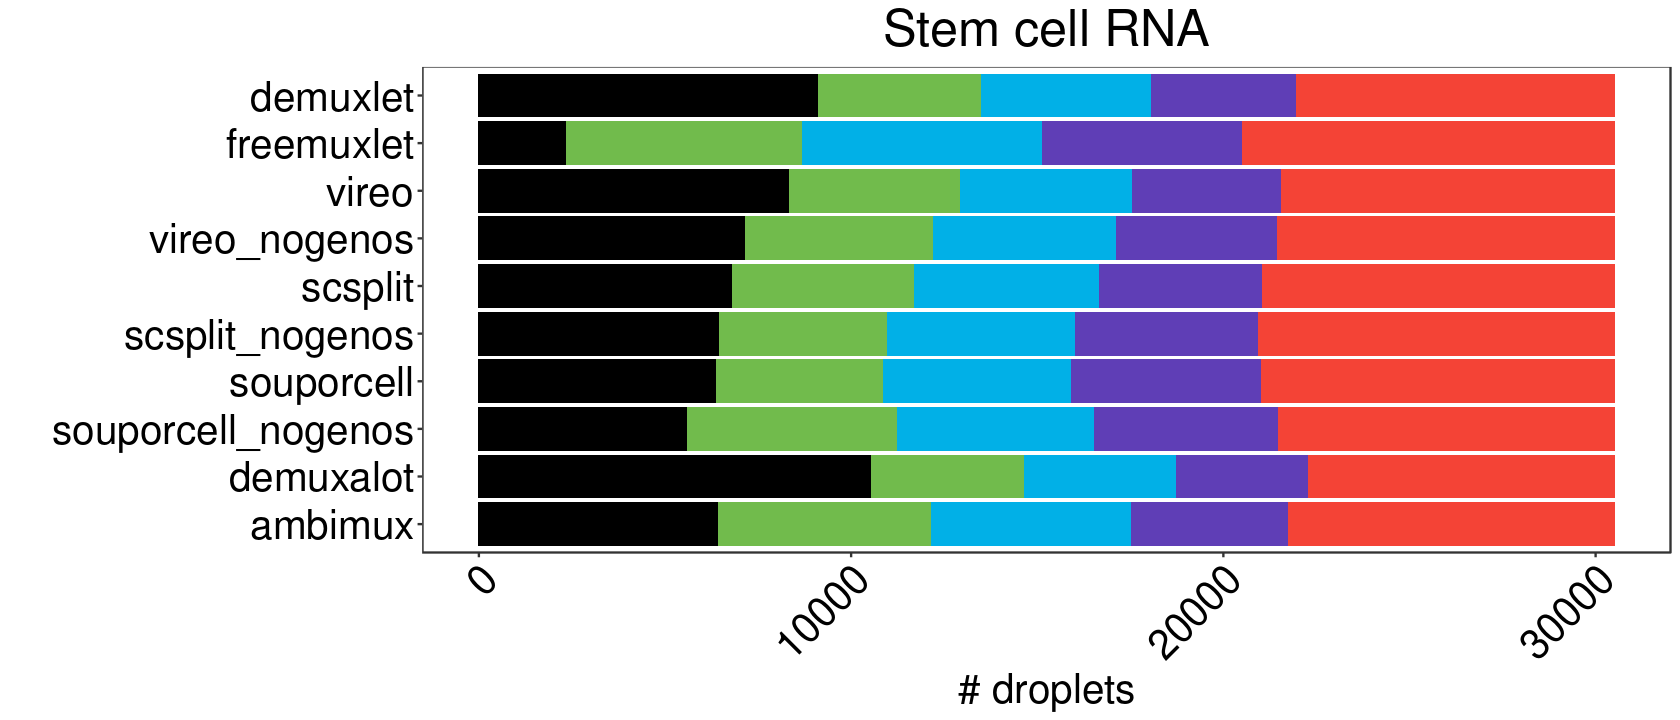

In [18]:
options(repr.plot.width=14, repr.plot.height=6)

p1 <- ggplot(igvf_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell RNA",fill='Assignment', y='# droplets') +
coord_flip()
p1

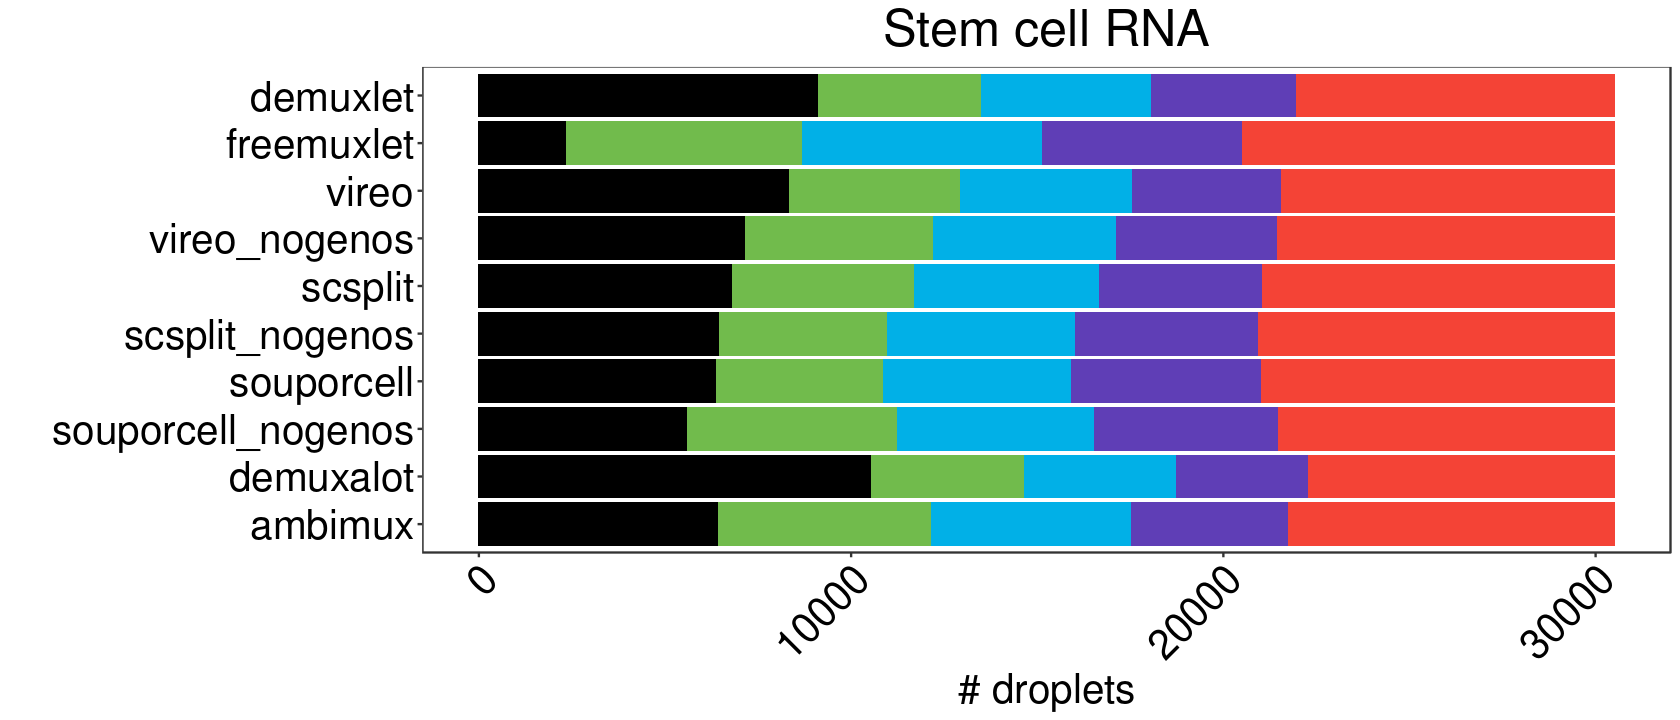

In [19]:
p1 <- ggplot(igvf_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell RNA",fill='Assignment', y='# droplets') +
coord_flip()
p1

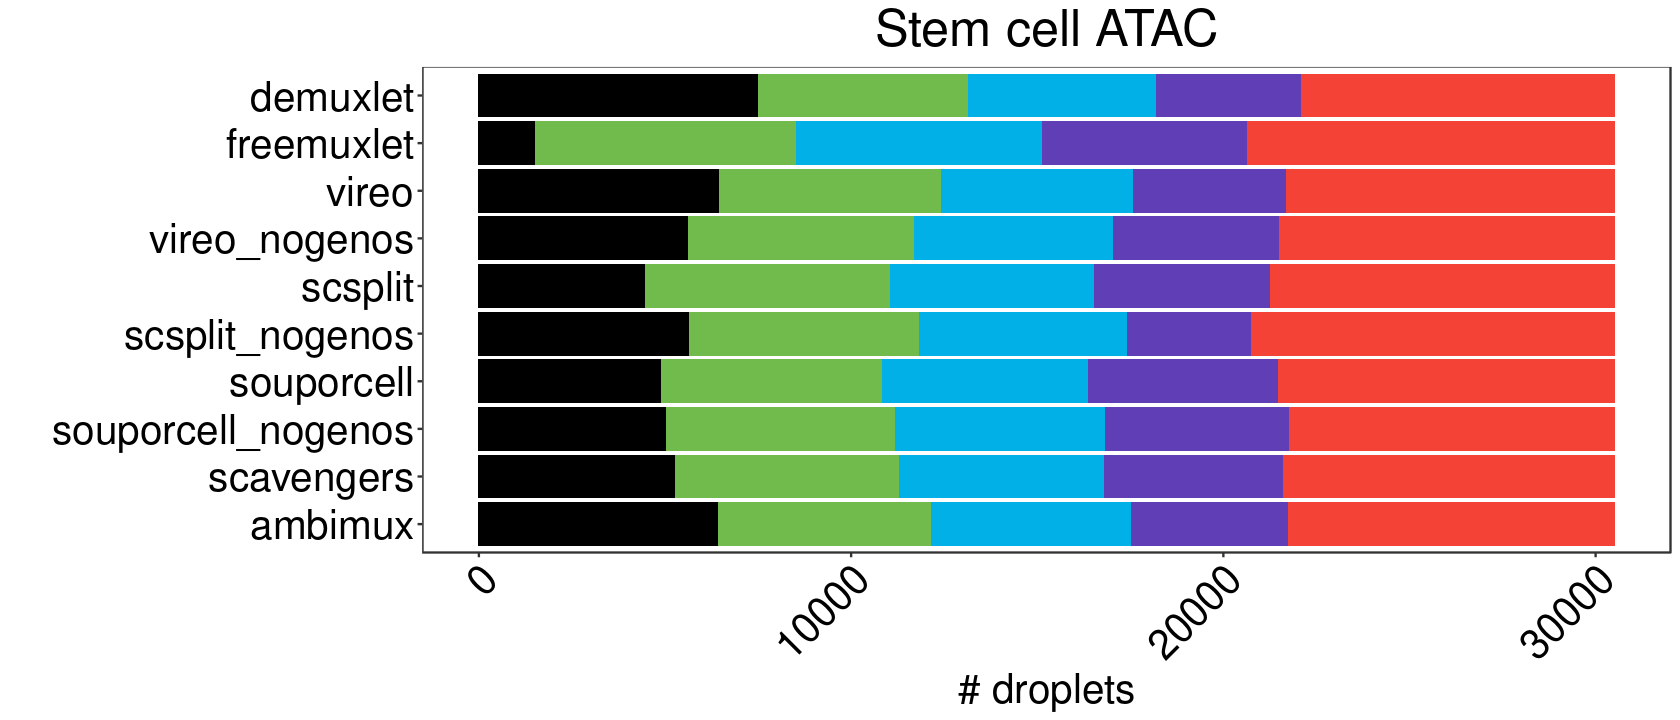

In [20]:
p2 <- ggplot(igvf_atac_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=1, hjust=1, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = igvf_palette) + 
labs(title = "Stem cell ATAC",fill='Assignment', y='# droplets') +
coord_flip()
p2

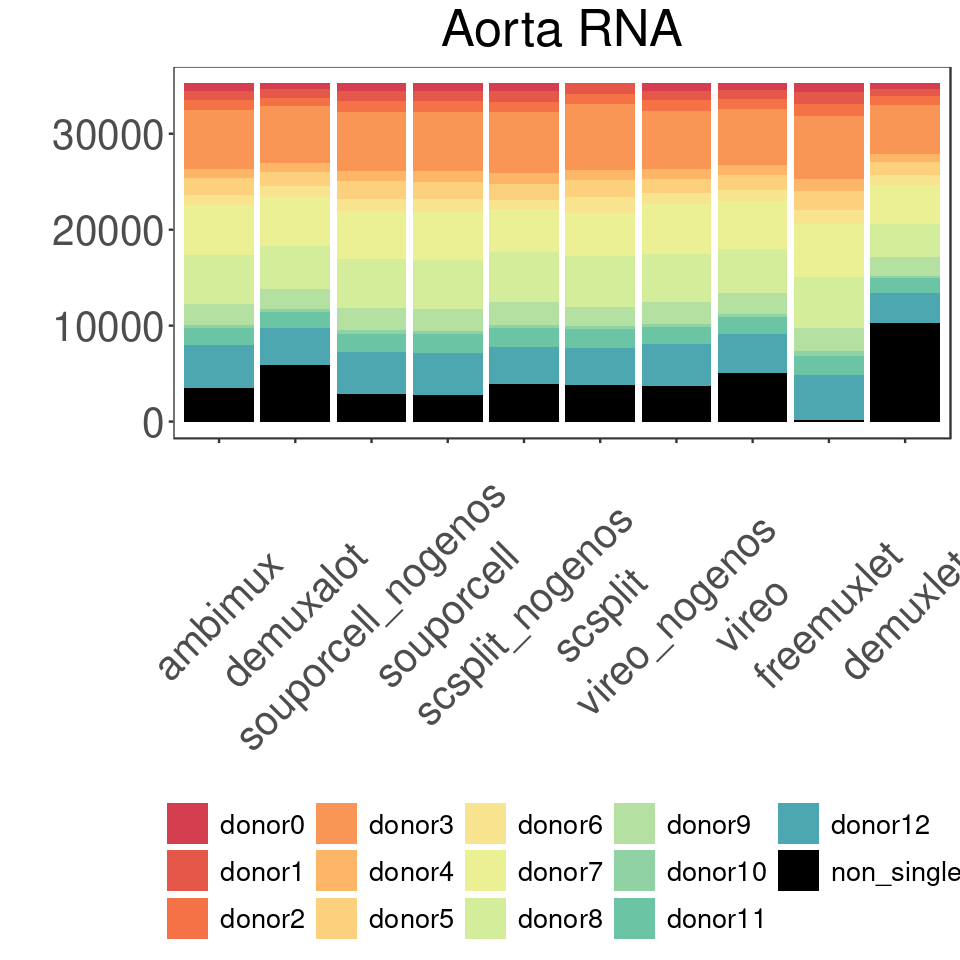

In [21]:
options(repr.plot.width=8, repr.plot.height=8)

ggplot(adelus_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=0.4),
        axis.text.y = element_text(size=axis_size,angle=0),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'bottom',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
#     scale_fill_manual(values = adelus_palette) + 
labs(title = "Aorta RNA",fill='Assignment') +
    scale_fill_manual(values = adelus_palette) +
  guides(fill = guide_legend(title = NULL, override.aes = list(size = 1.5)))


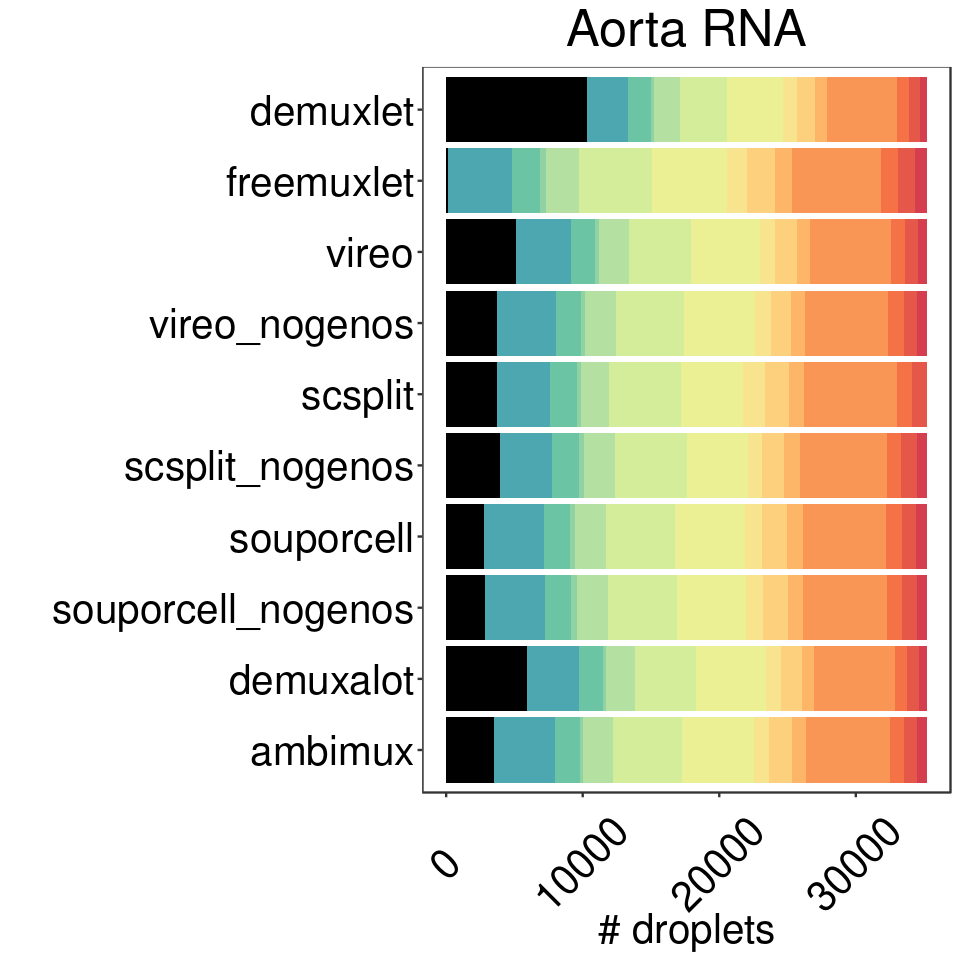

In [22]:
options(repr.plot.width=8, repr.plot.height=8)

p3 <- ggplot(adelus_gex_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=0.4, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
#     scale_fill_manual(values = adelus_palette) + 
labs(title = "Aorta RNA",fill='Assignment',y='# droplets') +
    scale_fill_manual(values = adelus_palette) +
coord_flip()
p3

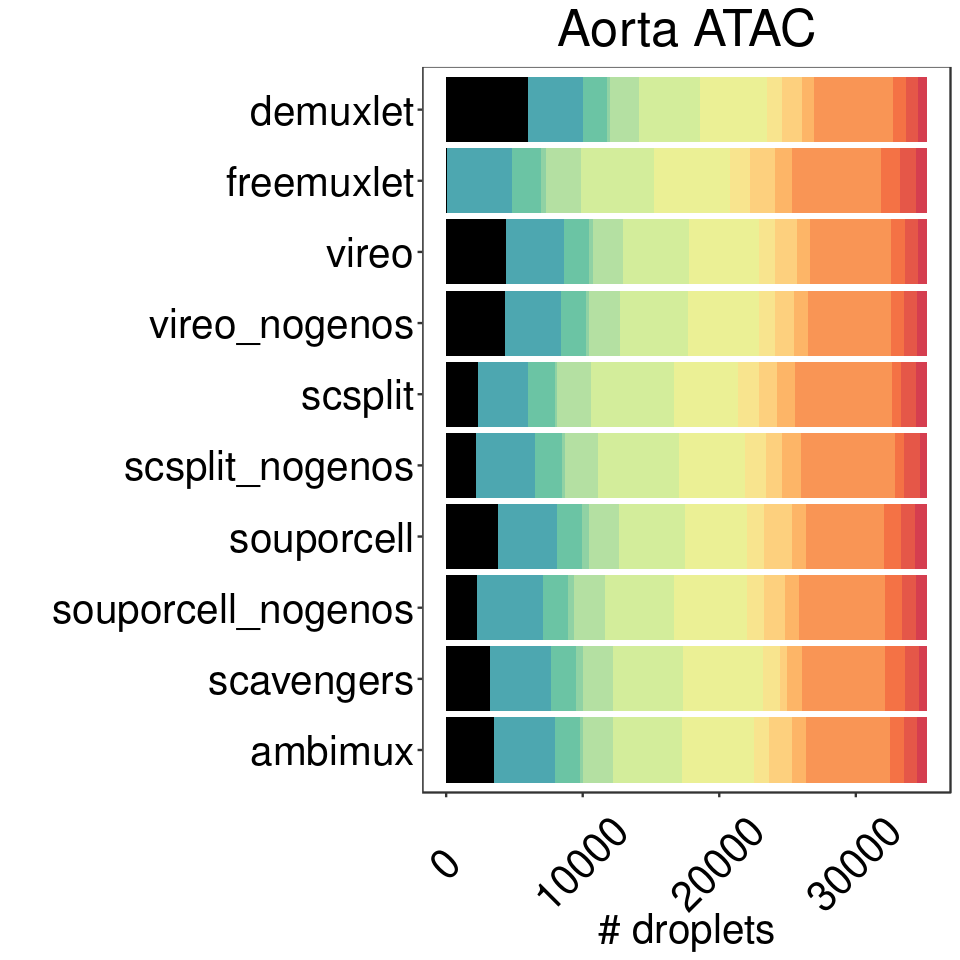

In [23]:
options(repr.plot.width=8, repr.plot.height=8)

p4 <- ggplot(adelus_atac_sings, aes(x = variable, fill = value)) +
  geom_bar(position = "stack") +
  labs(x = "", y = "") +
  theme_bw() +
   theme(axis.text.x = element_text(size=axis_size,angle=45, vjust=0.4, color='black'),
        axis.text.y = element_text(size=axis_size,angle=0, color='black'),
        axis.title.x = element_text(size=axis_size),
        axis.title.y = element_text(size=axis_size),
         legend.position = 'none',
         legend.key.size = unit(1, "cm"), 
         legend.text = element_text(size = 16),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
    scale_fill_manual(values = adelus_palette) + 
labs(title = "Aorta ATAC",fill='Assignment', y='# droplets') +
coord_flip()
p4

In [24]:
# prow <- plot_grid(p1, p2, p3, p4,
#   align = 'vh',
#   labels = c("A", "B", 'C', 'D'),
#   nrow = 2
# )
# combined_plot <- plot_grid(prow, rel_widths = c(4, .1), width=50)
# final_plot <- ggdraw() +
#   draw_text("Droplet type accuracy", x = 0.5, y = 0.98, hjust = 0.5, vjust = 1,
#             size = 25, color = "black", family = "arial") +
#   draw_plot(combined_plot, x = 0, y = 0, width = 1, height = 0.9)

# # Show the final plot
# print(final_plot)

In [25]:
table(adelus_atac_sings$variable)


           ambimux         scavengers souporcell_nogenos         souporcell 
             35201              35201              35201              35201 
   scsplit_nogenos            scsplit      vireo_nogenos              vireo 
             35201              35201              35201              35201 
        freemuxlet           demuxlet 
             35201              35201 